In [46]:
import pandas as pd
df=pd.read_csv('C://Users//Bhavesh//bengaluru_hp.csv')
df.head()

,Unnamed: 0,location,size,total_sqft,bath,price,bhk,price_per_sq
0,0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,4,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000


In [64]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Devarachikkanahalli',
       'Hegde Nagar', 'Haralur Road', 'Hennur Road', 'Kothannur',
       'Kalena Agrahara', 'Kaval Byrasandra', 'ISRO Layout',
       'Garudachar Palya', 'EPIP Zone', 'Dasanapura', 'Kasavanhalli',
       'Sanjay nagar', 'Domlur', 'Sarjapura - At

C:\Users\Bhavesh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Bhavesh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


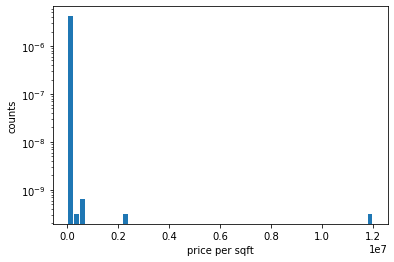

In [47]:
#plotting histogram
import matplotlib.pyplot as plt
plt.hist(df['price_per_sq'],bins=50,rwidth=.8,density=True)
plt.xlabel('price per sqft')
#after seeing the plot this dataset contain alot of outliers 
plt.ylabel('counts')
plt.yscale('log')
#using log scale can also give visulaization

In [48]:
df.price_per_sq.describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sq, dtype: float64

In [49]:
#trating outliers with percentile
max_thresold=df['price_per_sq'].quantile(.999)
max_thresold

50959.58041876099

In [50]:
min_thresold=df['price_per_sq'].quantile(.001)
min_thresold

1366.755486219

In [51]:
#valuse more than maxthesold and below min thresold considered to beoutlires
len(df[df['price_per_sq']>max_thresold])
len(df[df['price_per_sq']<min_thresold])


14

In [52]:
df.shape

(13246, 8)

In [53]:
df_percentile_outliers=df[(df['price_per_sq']>max_thresold) | (df['price_per_sq']<min_thresold)]

In [54]:
df_percentile_outliers.head()

,Unnamed: 0,location,size,total_sqft,bath,price,bhk,price_per_sq
345,349,other,3 Bedroom,11.0,3,74.0,3,672727.272700
667,674,Yelahanka,3 BHK,35000.0,3,130.0,3,371.428571
801,810,other,4 Bedroom,10961.0,4,80.0,4,729.860414
1010,1020,other,1 BHK,15.0,1,30.0,1,200000.000000
1112,1122,other,5 Bedroom,24.0,2,150.0,5,625000.000000


In [55]:
len(df_percentile_outliers)

28

In [56]:
df2 = df[(df.price_per_sq<max_thresold) & (df.price_per_sq>min_thresold)]
df2.shape
#df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]

(13172, 8)

In [57]:
#now removing outlier using 4 deviation 
upper_limit=df2.price_per_sq.mean() + 4*df2.price_per_sq.std()
lower_limit=df2.price_per_sq.mean() - 4*df2.price_per_sq.std()
print('upper limit : ',upper_limit)
print('lower limit : ',lower_limit)

upper limit :  23228.11206297769
lower limit :  -9899.959266944901


In [58]:
df3= df[(df.price_per_sq<upper_limit) & (df.price_per_sq>lower_limit)]
df3.shape

(13061, 8)

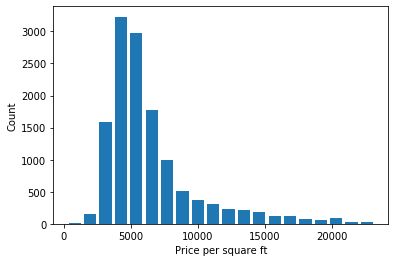

In [59]:
plt.hist(df3.price_per_sq, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

In [60]:
upper_limit=df3.price_per_sq.mean() + 1*df3.price_per_sq.std()
lower_limit=df3.price_per_sq.mean() - 1*df3.price_per_sq.std()
print('upper limit : ',upper_limit)
print('lower limit : ',lower_limit)


upper limit :  9934.381804118244
lower limit :  2953.0868110708293


In [67]:
#1deviation
df4= df3[(df3.price_per_sq<upper_limit) & (df3.price_per_sq>lower_limit)]
df4.shape


AttributeError: 'DataFrame' object has no attribute 'feature'

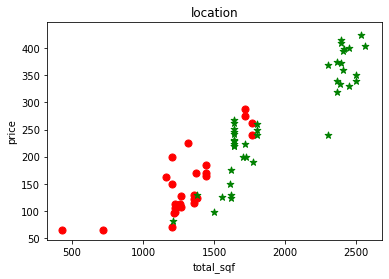

In [74]:
#plotting graph
import matplotlib

def plot(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] == (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='red',label='2bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='*',color='green',label='3bhk',s=50)
    plt.xlabel('total_sqf')
    plt.ylabel('price')
    plt.title('location')
    plt.legend
plot(df3,'Rajaji Nagar')

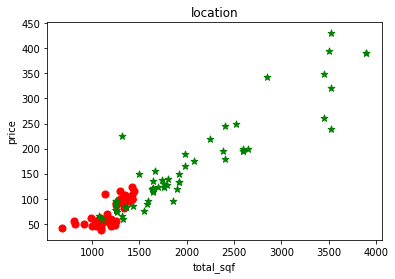

In [75]:
plot(df3,'Hebbal')